In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from time import sleep
import re
import pandas as pd

In [ ]:
with open("./test.txt", "r", encoding="utf-8") as f:
    text = f.read()

In [ ]:
content_list = re.split(r'<b>\s*.*\s*<\/b>', text)
content_list = [s.strip() for s in content_list]
len(content_list)

In [ ]:
title_list = re.findall(r'<b>\s*(.*)\s*<\/b>', text)
len(title_list)

In [ ]:
# TEMP: Figure out how to better align these
content_list = content_list[1:]

In [ ]:
# max_length = min(len(content_list), len(title_list))
# content_list = content_list[0:max_length]
# title_list = title_list[0:max_length]
# len(content_list), len(title_list)

In [ ]:
df = pd.DataFrame({'person': title_list, 'lines': content_list})
df

In [ ]:
# cleaning up person
# take first word of each title
df['person'] = df['person'].apply(lambda p: p.strip().split(' ')[0])
# if just number, replace with --TRANSITION--
df['person'] = df['person'].replace(r'\d+\.', '--TRANSITION--', regex=True)
# remove common cinematography titles, like CUT, INT, etc.
df = df[~df['person'].isin(['INT.', 'CUT', '(BEAT)'])]
# skip title
df = df.iloc[2:]
# if not in top 20 list of chars, then don't include (used to remove redundant stuff)
top_20 = df['person'].value_counts()[:20]
df = df[df['person'].isin(top_20.keys())]

df

In [ ]:
# cleaning up lines
# converting lines into single string for parsing
df['lines'] = df['lines'].apply(lambda l: ' '.join([line.strip() for line in l.split('\n')]))
df

In [ ]:
import pyphen

pyphen.language_fallback('nl_NL_variant1')
dic = pyphen.Pyphen(lang='nl_NL')

In [ ]:
# Performing hyphenation
df['syllables'] = df['lines'].apply(lambda l: dic.inserted(l).count('-'));
df

In [ ]:
df['person'].map(color_map)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sns.palplot(sns.color_palette("muted"))
color_labels = df['person'].unique()
rgb_values = sns.color_palette("Set2", 20)
color_map = dict(zip(color_labels, rgb_values))
color_labels


In [ ]:
plt.figure(figsize=(32,10)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid

plt.bar(x=range(0, len(df['syllables'])), height=df['syllables'], color=df['person'].map(color_map)) 

plt.legend([plt.Rectangle((0, 0), 1, 1, color=color_map[label]) for label in color_labels], color_labels)

plt.title('The Social Network') 
plt.xlabel('Syallables') 
plt.ylabel('Line Number') 
plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'matplotlib.pyplot' from 'c:\\Users\\Geoffrey\\Documents\\Programs\\Development\\Languages\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

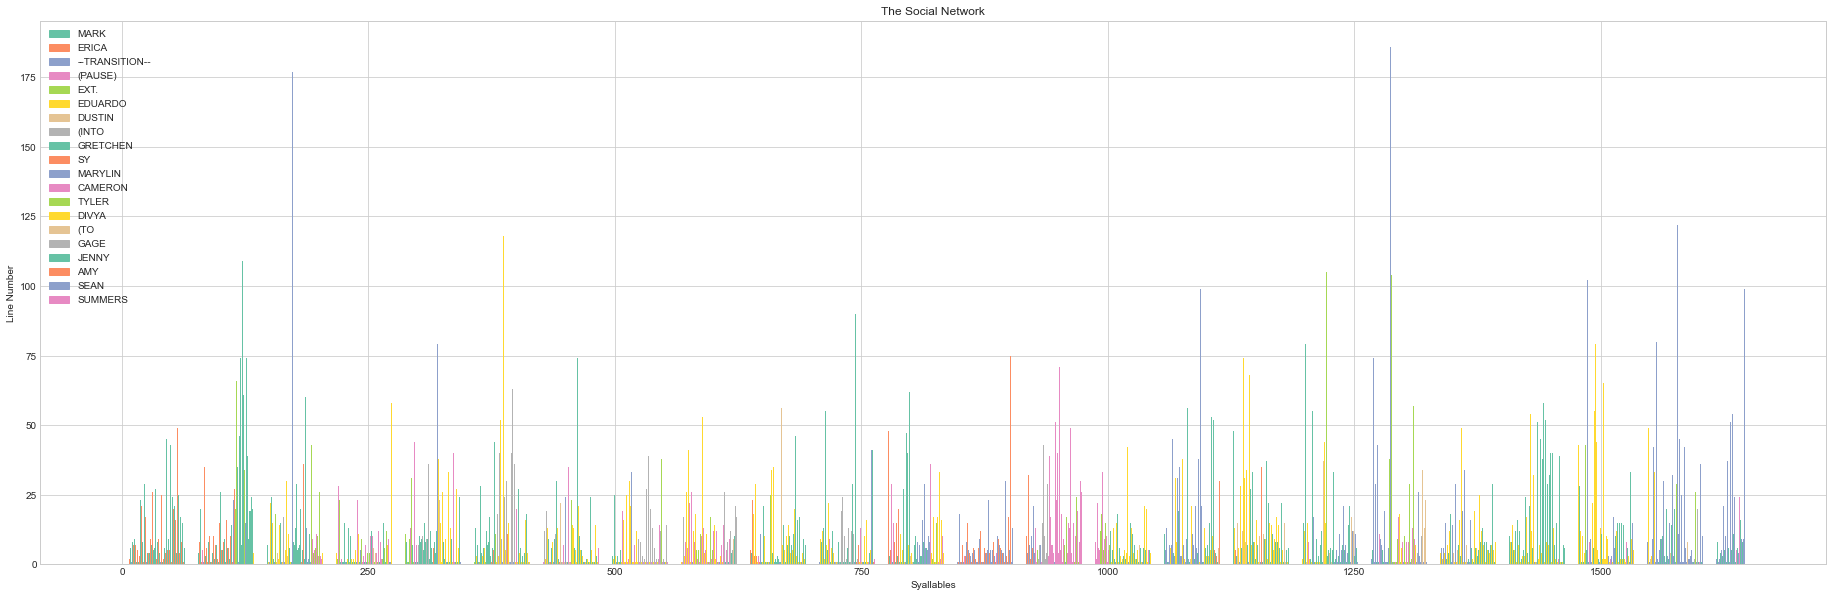

In [40]:
from TranscriptPlotter import TranscriptPlotter
%load_ext autoreload
%autoreload 2

tp = TranscriptPlotter('./test.txt')
tp.parse()
tp.plot()

In [ ]:
import re
re.match("test", "test").end()

In [ ]:
with open("text2.txt", "r", encoding="utf-8") as f:
    text = f.read()

content_list = re.split(r'<b>\s*.*\s*<\/b>', text)
content_list = [s.strip() for s in content_list]

title_list = re.findall(r'<b>\s*(.*)\s*<\/b>', text)

# TEMP: Figure out how to better align these
content_list = content_list[1:]
[s.strip() for s in content_list]

In [38]:
content_list

['THE SOCIAL NETWORK\n\n\n\n                                    Written by\n\n                                   Aaron Sorkin\n\n\n\n\n\n                                                          May 28, 2009\n                         \n\n                         \n\n          FROM THE BLACK WE HEAR--\n\n                         MARK (V.O.)\n          Did you know there are more people with\n          genius IQ\'s living in China than there\n          are people of any kind living in the\n          United States?\n\n                         ERICA (V.O. )\n          That can\'t be true.\n\n                         MARK (V.O.)\n          it is true.\n\n                         ERICA (V.O.)\n          What would account for that?\n\n                         MARK (V.0.)\n          Well first of all, a lot of people live\n          in China. But here\'s my question:\n\n                         FADE IN\n\n          INT. CAMPUS BAR - NIGHT\n\n          MARK ZUCKERBERG is a sweet looking 19 yea